In [1]:
import os

In [2]:
print(os.getcwd())

D:\大三下\实训\Contest


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('uid_train.txt', sep=  '\t', header = None)
df.columns = ['uid', 'label']

sms = pd.read_csv('sms_train.txt', sep = '\t', header = None)
sms.columns = ['uid', 'opp_num', 'opp_head', 'opp_len', 'start_time', 'in_out']

voice = pd.read_csv("voice_train.txt", sep = '\t', header = None)
voice.columns = ['uid', 'opp_num', 'opp_head', 'opp_len', 'start_time', 'end_time', 'call_type', 'in_out']

wa = pd.read_csv("wa_train.txt", sep = '\t', header = None)
wa.columns = ['uid', 'wa_name', 'visit_cnt', 'visit_dura', 'up_flow', 'down_flow', 'wa_type', 'date']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df.shape)
df.head(3)

(4999, 2)


,uid,label
0,u0001,0
1,u0002,0
2,u0003,0


In [6]:
print(sms.shape)
sms.head(3)

(302976, 6)


,uid,opp_num,opp_head,opp_len,start_time,in_out
0,u4003,B378E065731B897E7295926B27CBA0D5,186,11,20174042,1
1,u4003,B378E065731B897E7295926B27CBA0D5,186,11,20174130,1
2,u4003,1B15607F3E6D167B44D46046D5993D87,189,11,20015746,0


In [7]:
sms_feat = pd.DataFrame()
gp = sms.groupby('uid')['opp_num']
x = gp.apply(lambda x:x.count())
sms_feat['uid'] = x.index
sms_feat['sms_opp_count_all'] = x.values

gp = sms.groupby('uid')['opp_num']
x = gp.apply(lambda x : len(set(x)))
sms_feat['sms_opp_count_unique'] = x.values

gp = sms.groupby(['uid', 'in_out'])['opp_num']
x = gp.apply(lambda  x : x.count())
x = x.unstack(fill_value = 0).reset_index(drop = True)
x.columns = ['0', '1']
sms_feat['sms_opp_count_out'] = x['0']
sms_feat['sms_opp_count_in'] = x['1']
df = df.merge(sms_feat, on='uid', how = 'left').reset_index(drop = True)
df = df.fillna(0)
sms_feat.head(3)

,uid,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in
0,u0001,95,11,39,56
1,u0002,1,1,0,1
2,u0003,28,2,0,28


In [8]:
wa.head(3)

,uid,wa_name,visit_cnt,visit_dura,up_flow,down_flow,wa_type,date
0,u0001,155导航,5.0,207.0,313.0,457.0,0.0,14.0
1,u0001,155导航,7.0,396.0,547.0,659.0,0.0,4.0
2,u0001,155导航,10.0,3212.0,781.0,941.0,0.0,12.0


In [9]:
wa_feat = pd.DataFrame()

In [10]:
gp = wa.groupby('uid')['visit_cnt']
x = gp.apply(lambda x:x.sum())
wa_feat['uid'] = x.index
wa_feat['wa_visit_cnt_sum'] = x.values

gp = wa.groupby('uid')['wa_name']
x = gp.apply(lambda  x:len(set(x)))
wa_feat['wa_visit_count_unique'] = x.values

gp = wa.groupby('uid')['visit_dura']
x = gp.apply(lambda x:x.mean())
wa_feat['wa_visit_dura_mean'] = x.values

gp = wa.groupby('uid')['up_flow']
x = gp.apply(lambda  x:x.mean())
wa_feat['wa_up_flow_mean'] = x.values

gp = wa.groupby('uid')['down_flow']
x = gp.apply(lambda  x:x.mean())
wa_feat['wa_down_flow_mean'] = x.values

gp = wa.groupby(['uid','wa_type'])['wa_name']
x = gp.apply(lambda x:x.count())
x = x.unstack(fill_value = 0).reset_index(drop = True)
x.columns = ['0','1']
wa_feat['wa_count_type0'] = x['0']
wa_feat['wa_count_type1'] = x['1']

wa_feat.head(3)

,uid,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,wa_down_flow_mean,wa_count_type0,wa_count_type1
0,u0001,97694.0,181,96725.498701,172279.362771,8.325406e+05,955.0,200.0
1,u0002,178.0,5,15229.413793,4433.551724,3.267207e+03,29.0,0.0
2,u0003,23793.0,178,25471.857755,60843.138817,1.115881e+06,982.0,185.0


In [11]:
df = df.merge(wa_feat, on='uid', how = 'left').reset_index(drop =True)
df = df.fillna(0)

In [12]:
df.head(3)

,uid,label,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,wa_down_flow_mean,wa_count_type0,wa_count_type1
0,u0001,0,95.0,11.0,39.0,56.0,97694.0,181,96725.498701,172279.362771,8.325406e+05,955.0,200.0
1,u0002,0,1.0,1.0,0.0,1.0,178.0,5,15229.413793,4433.551724,3.267207e+03,29.0,0.0
2,u0003,0,28.0,2.0,0.0,28.0,23793.0,178,25471.857755,60843.138817,1.115881e+06,982.0,185.0


In [13]:
print(voice.shape)


(1150778, 8)


In [14]:
voice.head(3)

,uid,opp_num,opp_head,opp_len,start_time,end_time,call_type,in_out
0,u0113,38D54642A237A11BB18455FC1E505292,132,11,26115956,26120033,1,1
1,u0113,38D54642A237A11BB18455FC1E505292,132,11,26115623,26115707,1,1
2,u0113,38D54642A237A11BB18455FC1E505292,132,11,26174233,26174321,1,1


In [15]:
voice_feat = pd.DataFrame()
gp = voice.groupby('uid')['opp_num']
x = gp.apply(lambda  x:x.count())
voice_feat['uid'] = x.index
voice_feat['voice_opp_count_all'] = x.values

gp = voice.groupby('uid')['opp_num']
x = gp.apply(lambda x: len(set(x)))
voice_feat['voice_opp_count_unique'] = x.values

gp = voice.groupby(['uid', 'in_out'])['opp_num']
x = gp.apply(lambda x:x.count())
x = x.unstack(fill_value=0).reset_index(drop=True)
x.columns = ['0','1']
voice_feat['voice_opp_count_out'] = x['0']
voice_feat['voice_opp_count_in'] = x['1']

gp = voice.groupby(['uid','call_type'])['opp_num']
x = gp.apply(lambda x: x.count())
x = x.unstack(fill_value=0).reset_index(drop = True)
x.columns=['1','2','3','4','5']
voice_feat['voice_count_type1'] = x['1']
voice_feat['voice_count_type2'] = x['2']
voice_feat['voice_count_type3'] = x['3']
voice_feat['voice_count_type4'] = x['4']
voice_feat['voice_count_type5'] = x['5']

voice_feat.head(3)

,uid,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
0,u0001,79,22,33,46,79,0,0,0,0
1,u0002,2,2,2,0,2,0,0,0,0
2,u0003,21,15,7,14,21,0,0,0,0


In [16]:
voice_feat.head(1)

,uid,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
0,u0001,79,22,33,46,79,0,0,0,0


In [17]:
df = df.merge(voice_feat, on = 'uid', how = 'left').reset_index(drop=True)
df = df.fillna(0)

In [22]:
%matplotlib inline

In [23]:
df

,uid,label,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,...,wa_count_type1,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
0,u0001,0,95.0,11.0,39.0,56.0,97694.0,181,96725.498701,172279.362771,...,200.0,79.0,22.0,33.0,46.0,79.0,0.0,0.0,0.0,0.0
1,u0002,0,1.0,1.0,0.0,1.0,178.0,5,15229.413793,4433.551724,...,0.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
2,u0003,0,28.0,2.0,0.0,28.0,23793.0,178,25471.857755,60843.138817,...,185.0,21.0,15.0,7.0,14.0,21.0,0.0,0.0,0.0,0.0
3,u0004,0,124.0,10.0,19.0,105.0,56631.0,298,40928.322619,181739.734524,...,308.0,254.0,77.0,133.0,121.0,218.0,6.0,30.0,0.0,0.0
4,u0005,0,48.0,4.0,2.0,46.0,13835.0,130,25504.252730,63241.511700,...,84.0,401.0,55.0,177.0,224.0,398.0,0.0,3.0,0.0,0.0
5,u0006,0,30.0,3.0,1.0,29.0,7472.0,164,17260.985567,129938.410309,...,76.0,44.0,21.0,8.0,36.0,39.0,5.0,0.0,0.0,0.0
6,u0007,0,42.0,2.0,0.0,42.0,38916.0,209,32622.485562,93369.759119,...,213.0,101.0,60.0,37.0,64.0,98.0,1.0,2.0,0.0,0.0
7,u0008,0,379.0,10.0,150.0,229.0,28601.0,171,31281.470037,79271.781835,...,154.0,234.0,71.0,135.0,99.0,234.0,0.0,0.0,0.0,0.0
8,u0009,0,15.0,2.0,0.0,15.0,30084.0,157,35580.856742,160329.644195,...,178.0,96.0,21.0,36.0,60.0,81.0,1.0,14.0,0.0,0.0
9,u0010,0,34.0,2.0,0.0,34.0,6957.0,32,82942.885057,106258.160920,...,30.0,130.0,37.0,63.0,67.0,121.0,0.0,9.0,0.0,0.0


In [24]:
df['voice_out_in_pro'] = df['voice_opp_count_out']/df['voice_opp_count_in']

In [25]:
chu1 = df.label[df.voice_out_in_pro > 1].value_counts()

In [26]:
chu2 = df.label[df.voice_out_in_pro <= 1].value_counts()

NameError: name 'plt' is not defined

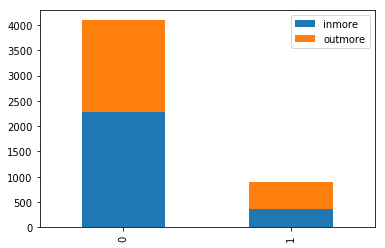

In [27]:
newdf = pd.DataFrame({u'outmore':chu1, u'inmore':chu2})
newdf.plot(kind='bar', stacked=True)
plt.xlabel(u'protion')
plt.show()

In [30]:
df.describe()

,label,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,wa_down_flow_mean,...,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5,voice_out_in_pro
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4.999000e+03,4.999000e+03,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4987.000000
mean,0.180036,60.607321,6.569914,15.157431,45.449890,39489.635727,156.156431,3.732229e+04,1.809292e+05,2.258419e+06,...,230.201640,50.822565,118.073815,112.127826,202.984797,11.521304,15.664533,0.006001,0.025005,inf
std,0.384256,117.742263,12.403008,60.652737,98.000289,54186.369777,120.565954,3.557952e+04,3.350775e+05,4.635248e+06,...,409.802458,166.728299,252.563086,191.333194,381.146046,36.965358,43.866751,0.257664,0.603755,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,2.000000,0.000000,2.000000,2134.500000,49.000000,1.424847e+04,3.163425e+04,2.095534e+05,...,27.000000,9.000000,11.000000,12.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.582190
50%,0.000000,24.000000,3.000000,2.000000,18.000000,18629.000000,146.000000,3.086924e+04,9.435746e+04,8.169904e+05,...,94.000000,22.000000,44.000000,46.000000,76.000000,1.000000,1.000000,0.000000,0.000000,0.975332
75%,0.000000,68.000000,7.000000,9.000000,52.000000,55004.500000,235.000000,5.091897e+04,2.152934e+05,2.350999e+06,...,247.500000,54.000000,120.000000,126.000000,210.500000,6.000000,12.000000,0.000000,0.000000,1.657143
max,1.000000,3484.000000,219.000000,1181.000000,3478.000000,524144.000000,853.000000,1.004838e+06,1.026121e+07,1.396488e+08,...,8129.000000,8038.000000,7972.000000,3051.000000,7964.000000,512.000000,895.000000,17.000000,28.000000,inf


In [31]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import auc, f1_score

df = df.drop(['voice_out_in_pro'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
df.head(1)

,uid,label,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,...,wa_count_type1,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
0,u0001,0,95.0,11.0,39.0,56.0,97694.0,181,96725.498701,172279.362771,...,200.0,79.0,22.0,33.0,46.0,79.0,0.0,0.0,0.0,0.0


In [18]:
df.to_csv("train_feat.csv", index = False)

In [20]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import auc, f1_score
y = df.label
X= df.drop(['uid', 'label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X

,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,wa_down_flow_mean,wa_count_type0,wa_count_type1,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
0,95.0,11.0,39.0,56.0,97694.0,181,96725.498701,172279.362771,8.325406e+05,955.0,200.0,79.0,22.0,33.0,46.0,79.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,178.0,5,15229.413793,4433.551724,3.267207e+03,29.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
2,28.0,2.0,0.0,28.0,23793.0,178,25471.857755,60843.138817,1.115881e+06,982.0,185.0,21.0,15.0,7.0,14.0,21.0,0.0,0.0,0.0,0.0
3,124.0,10.0,19.0,105.0,56631.0,298,40928.322619,181739.734524,2.082341e+06,1372.0,308.0,254.0,77.0,133.0,121.0,218.0,6.0,30.0,0.0,0.0
4,48.0,4.0,2.0,46.0,13835.0,130,25504.252730,63241.511700,3.556163e+05,557.0,84.0,401.0,55.0,177.0,224.0,398.0,0.0,3.0,0.0,0.0
5,30.0,3.0,1.0,29.0,7472.0,164,17260.985567,129938.410309,4.755078e+05,409.0,76.0,44.0,21.0,8.0,36.0,39.0,5.0,0.0,0.0,0.0
6,42.0,2.0,0.0,42.0,38916.0,209,32622.485562,93369.759119,1.075190e+06,1103.0,213.0,101.0,60.0,37.0,64.0,98.0,1.0,2.0,0.0,0.0
7,379.0,10.0,150.0,229.0,28601.0,171,31281.470037,79271.781835,7.347400e+05,914.0,154.0,234.0,71.0,135.0,99.0,234.0,0.0,0.0,0.0,0.0
8,15.0,2.0,0.0,15.0,30084.0,157,35580.856742,160329.644195,1.936441e+06,890.0,178.0,96.0,21.0,36.0,60.0,81.0,1.0,14.0,0.0,0.0
9,34.0,2.0,0.0,34.0,6957.0,32,82942.885057,106258.160920,2.418370e+06,57.0,30.0,130.0,37.0,63.0,67.0,121.0,0.0,9.0,0.0,0.0


In [22]:
X_train

,sms_opp_count_all,sms_opp_count_unique,sms_opp_count_out,sms_opp_count_in,wa_visit_cnt_sum,wa_visit_count_unique,wa_visit_dura_mean,wa_up_flow_mean,wa_down_flow_mean,wa_count_type0,wa_count_type1,voice_opp_count_all,voice_opp_count_unique,voice_opp_count_out,voice_opp_count_in,voice_count_type1,voice_count_type2,voice_count_type3,voice_count_type4,voice_count_type5
3566,328.0,4.0,3.0,325.0,8054.0,107,21633.374194,7.528020e+04,9.740083e+05,56.0,11.0,173.0,66.0,88.0,85.0,167.0,5.0,1.0,0.0,0.0
4548,75.0,16.0,69.0,6.0,62.0,5,21234.250000,1.181962e+05,1.628298e+05,1801.0,291.0,379.0,376.0,366.0,13.0,368.0,2.0,9.0,0.0,0.0
4299,49.0,10.0,9.0,40.0,289318.0,336,114455.670711,2.939886e+05,1.290087e+06,2061.0,417.0,300.0,234.0,244.0,56.0,257.0,19.0,24.0,0.0,0.0
829,50.0,1.0,0.0,50.0,115660.0,318,53051.969022,2.346408e+05,6.512586e+06,1370.0,308.0,78.0,24.0,39.0,39.0,67.0,11.0,0.0,0.0,0.0
4734,9.0,1.0,0.0,9.0,126768.0,323,60979.119713,3.124127e+05,1.847818e+06,90.0,23.0,22.0,12.0,14.0,8.0,20.0,1.0,1.0,0.0,0.0
826,1.0,1.0,1.0,0.0,72.0,12,5519.944444,1.152678e+04,3.496861e+04,80.0,8.0,3.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
4094,2.0,1.0,2.0,0.0,909.0,48,6369.636364,2.169460e+04,6.146652e+04,606.0,136.0,158.0,21.0,86.0,72.0,149.0,6.0,3.0,0.0,0.0
770,577.0,10.0,17.0,560.0,64433.0,280,49655.183708,2.387177e+05,2.769889e+06,1305.0,393.0,771.0,140.0,319.0,452.0,640.0,0.0,131.0,0.0,0.0
4611,2.0,2.0,1.0,1.0,393.0,31,9659.379310,1.516224e+04,2.457269e+05,1055.0,220.0,8.0,2.0,1.0,7.0,8.0,0.0,0.0,0.0,0.0
2696,1.0,1.0,1.0,0.0,8198.0,162,14944.232295,5.037353e+04,5.053274e+05,255.0,40.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
test = df.values

In [25]:
test

array([['u0001', 0, 95.0, ..., 0.0, 0.0, 0.0],
       ['u0002', 0, 1.0, ..., 0.0, 0.0, 0.0],
       ['u0003', 0, 28.0, ..., 0.0, 0.0, 0.0],
       ..., 
       ['u4997', 1, 3.0, ..., 16.0, 0.0, 0.0],
       ['u4998', 1, 3.0, ..., 6.0, 0.0, 0.0],
       ['u4999', 1, 6.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [26]:
test_y = test[0::, 0]

In [27]:
test_y

array(['u0001', 'u0002', 'u0003', ..., 'u4997', 'u4998', 'u4999'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classfiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classfier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classfiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]/10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classfier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classfier', data=log, color="b")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:719: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:722: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do 

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
cllf = RandomForestClassifier()
cllf.fit(X_train, y_train)
p_result = cllf.predict(X_test)

In [37]:
p_result = cllf.predict(X)

In [42]:
p_result

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
ans =pd.DataFrame({'uid':df.uid,'label':p_result})
ans=ans.sort_values(by='label',ascending=False)
ans.label=res.label.map(lambda x: 1 if x>=0.5 else 0)
ans.label = res.label.map(lambda x: int(x))
ans.to_csv('result.csv',index=False,header=False,sep=',',columns=['uid','label'])

In [44]:
res

,label,uid
0,0,u0001
1,0,u0002
2,0,u0003
3,0,u0004
4,0,u0005
5,0,u0006
6,0,u0007
7,0,u0008
8,0,u0009
9,0,u0010
